In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data processing 

In [423]:
df=pd.read_csv("fundamentals.csv")
y=pd.read_csv("y.csv")

In [424]:
df.shape

(1781, 79)

In [426]:
df["Period Ending"]=pd.to_datetime(df["Period Ending"])
df["Period Ending"]=df["Period Ending"].dt.year

In [427]:
df1=df.merge(y,left_on=["For Year","Ticker Symbol"],right_on=["year","symbol"],how="left")

In [428]:
df1.drop(columns=["For Year","Ticker Symbol","Unnamed: 0","year"],inplace=True)
df1=df1.dropna()

In [429]:
df1.isnull().values.any()

False

In [430]:
company=[]
for i in range(len(df1.symbol.unique())):
    company.append(i+1)

In [431]:
dic=dict(zip(df1.symbol.unique(),company))

In [432]:
name=[]
for i in [28,38,40,43,45,73,74]:
    name.append(col[i])

In [433]:
df1["symbol"].replace(dic,inplace=True)

In [434]:
df1.head()

,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,symbol,open,close,low,high,volume
0,2012,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,...,2.485500e+10,-367000000.0,-5.60,3.350000e+08,1,10.478520,10.496160,10.246760,10.748760,7.769353e+06
1,2013,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,...,2.674300e+10,0.0,-11.25,1.630222e+08,1,18.198929,18.187936,17.898254,18.502540,8.085908e+06
2,2014,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,...,4.265000e+10,0.0,4.02,7.169154e+08,1,38.862183,38.923651,38.230000,39.549802,1.239314e+07
3,2015,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,...,4.099000e+10,0.0,11.39,6.681299e+08,1,45.184246,45.122103,44.447778,45.835714,1.155355e+07
4,2012,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,...,6.205003e+09,-27095000.0,5.29,7.328355e+07,2,75.983320,76.074120,75.259200,76.822120,1.130570e+06


In [435]:
y=df1[["close","symbol","Period Ending"]]
y=y.set_index(["symbol","Period Ending"])

In [436]:
len(y)

1288

In [437]:
df1=df1.set_index(["symbol","Period Ending"])
X=df1.iloc[:,:75]

In [438]:
len(X)

1288

In [369]:
X.head()

Accounts Payable  Accounts Receivable  \
symbol Period Ending                                          
1      2012               3.068000e+09         -222000000.0   
       2013               4.975000e+09          -93000000.0   
       2014               4.668000e+09         -160000000.0   
       2015               5.102000e+09          352000000.0   
2      2012               2.409453e+09          -89482000.0   

                      Add'l income/expense items  After Tax ROE  \
symbol Period Ending                                              
1      2012                        -1.961000e+09           23.0   
       2013                        -2.723000e+09           67.0   
       2014                        -1.500000e+08          143.0   
       2015                        -7.080000e+08          135.0   
2      2012                         6.000000e+05           32.0   

                      Capital Expenditures  Capital Surplus  Cash Ratio  \
symbol Period Ending                                                      
1      2012                  -1.888000e+09     4.695000e+09        53.0   
       2013                  -3.114000e+09     1.059200e+10        75.0   
       2014                  -5.311000e+09     1.513500e+10        60.0   
       2015                  -6.151000e+09     1.159100e+10        51.0   
2      2012                  -2.711820e+08     5.202150e+08        23.0   

                      Cash and Cash Equivalents  Changes in Inventories  \
symbol Period Ending                                                      
1      2012                        1.330000e+09                     0.0   
       2013                        2.175000e+09                     0.0   
       2014                        1.768000e+09                     0.0   
       2015                        1.085000e+09                     0.0   
2      2012                        5.981110e+08            -260298000.0   

                      Common Stocks              ...               \
symbol Period Ending                             ...                
1      2012             127000000.0              ...                
       2013               5000000.0              ...                
       2014               7000000.0              ...                
       2015               6000000.0              ...                
2      2012                  7000.0              ...                

                      Total Assets  Total Current Assets  \
symbol Period Ending                                       
1      2012           2.351000e+10          7.072000e+09   
       2013           4.227800e+10          1.432300e+10   
       2014           4.322500e+10          1.175000e+10   
       2015           4.841500e+10          9.985000e+09   
2      2012           4.613814e+09          3.184200e+09   

                      Total Current Liabilities  Total Equity  \
symbol Period Ending                                            
1      2012                        9.011000e+09 -7.987000e+09   
       2013                        1.380600e+10 -2.731000e+09   
       2014                        1.340400e+10  2.021000e+09   
       2015                        1.360500e+10  5.635000e+09   
2      2012                        2.559638e+09  1.210694e+09   

                      Total Liabilities  Total Liabilities & Equity  \
symbol Period Ending                                                  
1      2012                2.489100e+10                1.690400e+10   
       2013                4.500900e+10                4.227800e+10   
       2014                4.120400e+10                4.322500e+10   
       2015                4.278000e+10                4.841500e+10   
2      2012                3.403120e+09                4.613814e+09   

                      Total Revenue  Treasury Stock  Earnings Per Share  \
symbol Period Ending                                                      
1      2012            2.485500e+10    -367000000

In [370]:
y.head()

close
symbol Period Ending           
1      2012           10.496160
       2013           18.187936
       2014           38.923651
       2015           45.122103
2      2012           76.074120

## Check multicolliearity

In [440]:
np.linalg.matrix_rank(X)

73

In [441]:
X.shape[1]

75

In [443]:
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

to_drop

['Earnings Before Tax',
 'Fixed Assets',
 'Income Tax',
 'Net Cash Flow-Operating',
 'Net Income',
 'Net Income Applicable to Common Shareholders',
 'Net Income-Cont. Operations',
 'Operating Income',
 'Pre-Tax Margin',
 'Pre-Tax ROE',
 'Profit Margin',
 'Quick Ratio',
 'Sales, General and Admin.',
 'Total Current Liabilities',
 'Total Liabilities',
 'Total Liabilities & Equity',
 'Total Revenue']

In [534]:
upper[upper['Changes in Inventories']>0.7]

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding


In [446]:
dele=['Earnings Before Tax',
 'Fixed Assets',
 'Income Tax',
 'Net Cash Flow-Operating',
 'Net Income Applicable to Common Shareholders',
 'Net Income-Cont. Operations',
 'Operating Income',
 'Pre-Tax Margin',
 'Pre-Tax ROE',
 'Pre-Tax Margin',
 'Quick Ratio',
 'Sales, General and Admin.',
 'Total Current Liabilities',
 'Total Liabilities',
 'Total Liabilities & Equity',
 'Cost of Revenue']
X.drop(columns=dele,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [448]:
X.shape[1]

60

## General Linear model

In [450]:
import statsmodels.api as sm 
res = sm.OLS(y.values,sm.add_constant(X.values)).fit()

In [451]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     32.19
Date:                Wed, 08 May 2019   Prob (F-statistic):          1.32e-208
Time:                        21:25:17   Log-Likelihood:                -6911.6
No. Observations:                1288   AIC:                         1.395e+04
Df Residuals:                    1227   BIC:                         1.426e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1036      6.514     -0.169      0.865     -13.883      11.676
x1          5.698e-09   1.11e-08      0.513      0.608   -1.61e-08    2.75e-08
x2          3.827e-09   6.78e-09      0.564      0.573   -9.48e-09    1.71e-08
x3           7.91e-10   3.31e-09      0.239      0.811    -5.7e-09    7.28e-09
x4            -0.0021      0.006     -0.346      0.730      -0.014       0.010
x5          1.166e-07   3.25e-07      0.359      0.719    -5.2e-07    7.53e-07
x6         -3.299e-10   1.22e-09     -0.270      0.787   -2.73e-09    2.07e-09
x7             0.0371      0.038      0.979      0.328      -0.037       0.111
x8         -2.985e-08   8.37e-08     -0.357      0.721   -1.94e-07    1.34e-07
x9          1.286e-08   7.16e-09      1.796      0.073   -1.19e-09    2.69e-08
x10        -1.459e-10   1.29e-09     -0.113      0.910   -2.68e-09    2.39e-09
x11            0.0204      0.029      0.696      0.487      -0.037       0.078
x12        -3.013e-09   1.67e-09     -1.804      0.071   -6.29e-09    2.63e-10
x13         1.763e-09   1.12e-08      0.158      0.875   -2.02e-08    2.37e-08
x14         1.269e-08   6.72e-09      1.888      0.059   -4.94e-10    2.59e-08
x15         1.093e-09   2.15e-09      0.507      0.612   -3.13e-09    5.32e-09
x16         -1.18e-09   1.99e-08     -0.059      0.953   -4.03e-08    3.79e-08
x17         1.609e-08   5.31e-09      3.033      0.002    5.68e-09    2.65e-08
x18         5.707e-10   5.91e-10      0.966      0.334   -5.89e-10    1.73e-09
x19            0.0369      0.098      0.375      0.708      -0.156       0.230
x20         1.794e-09   5.65e-10      3.175      0.002    6.85e-10     2.9e-09
x21         8.073e-10   6.09e-10      1.326      0.185   -3.88e-10       2e-09
x22        -2.453e-08   9.93e-09     -2.470      0.014    -4.4e-08   -5.05e-09
x23        -2.974e-08   8.38e-08     -0.355      0.723   -1.94e-07    1.35e-07
x24          1.15e-07   3.25e-07      0.354      0.723   -5.22e-07    7.52e-07
x25         1.402e-08   5.93e-09      2.366      0.018    2.39e-09    2.56e-08
x26          3.78e-09   1.12e-08      0.337      0.736   -1.82e-08    2.58e-08
x27          1.78e-09   5.38e-10      3.311      0.001    7.25e-10    2.84e-09
x28         1.676e-09   1.12e-08      0.149      0.882   -2.04e-08    2.37e-08
x29        -4.209e-09   1.69e-08     -0.249      0.804   -3.74e-08     2.9e-08
x30        -4.061e-09   2.88e-09     -1.410      0.159   -9.71e-09    1.59e-09
x31        -5.356e-09   6.12e-09     -0.875      0.382   -1.74e-08    6.65e-09
x32         1.119e-08   6.56e-09      1.707      0.088   -1.67e-09     2.4e-08
x33        -1.117e-07   3.25e-07     -0.344      0.731   -7.49e-07    5.26e-07
x34        -1.124e-08   6.49e-09     -1.731      0.084    -2.4e-08     1.5e-09
x35         5.858e-09   6.17e-09      0.949      0.343   -6.25e-09     1.8e-08
x3

In [473]:
col=["const"]
col.extend(X.columns.values)

In [554]:
p=dict(zip(col,res.pvalues))
dict((k, v) for k, v in p.items() if v<=0.05)

{'Cash and Cash Equivalents': 0.018129464005058882,
 'Changes in Inventories': 0.0032759331943199577,
 'Current Ratio': 0.02088628736857623,
 'Deferred Asset Charges': 0.002337552627351691,
 'Depreciation': 6.337269885059449e-05,
 'Equity Earnings/Loss Unconsolidated Subsidiary': 0.0,
 'Gross Profit': 0.0,
 'Interest Expense': 0.00444408587300793,
 'Inventory': 0.01334639429141915,
 'Liabilities': 0.04276226463663502,
 'Long-Term Investments': 0.0007787384832622646,
 'Net Receivables': 0.015734235511120298,
 'Non-Recurring Items': 6.216935162894899e-06,
 'Operating Margin': 7.018447163598118e-05,
 'Other Assets': 0.0032842163413946412,
 'Other Current Assets': 0.011312219585202454,
 'Profit Margin': 0.0065832652272030945,
 'Sale and Purchase of Stock': 0.02754682507451589,
 'Short-Term Investments': 0.01776197524268963,
 'Total Current Assets': 0.01310354974200112,
 'Total Revenue': 0.04662757191167599,
 'Treasury Stock': 0.006597662966111972,
 'Earnings Per Share': 0.0,
 'Estimated Sh

In [452]:
dframe=res.predict()

In [461]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y.values, dframe))
rmse

51.79114117612416

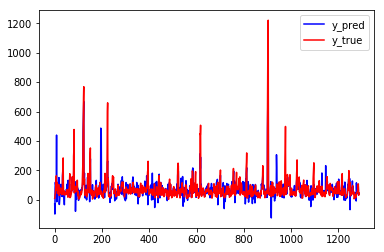

In [464]:
plt.plot(dframe,color="b",label="y_pred")
plt.plot(y.values,color="r",label="y_true")
plt.legend()


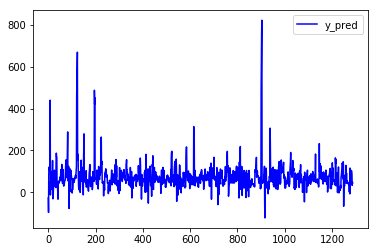

In [466]:
plt.plot(dframe,color="b",label="y_pred")
plt.legend()


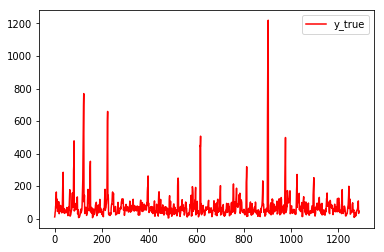

In [467]:
plt.plot(y.values,color="r",label="y_true")
plt.legend()


## Linear model for Panel data

In [499]:
from linearmodels import PanelOLS,RandomEffects

In [479]:
exog = sm.add_constant(X)

In [517]:
mod = PanelOLS(y,exog,time_effects=True)
res1 = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)

In [518]:
res1.summary

Dep. Variable:,close,R-squared:,0.6144
Estimator:,PanelOLS,R-squared (Between):,0.7020
No. Observations:,1288,R-squared (Within):,-0.6222
Date:,"Wed, May 08 2019",R-squared (Overall):,0.6102
Time:,21:59:52,Log-likelihood,-6894.7
Cov. Estimator:,Clustered,,
,,F-statistic:,32.479
Entities:,359,P-value,0.0000
Avg Obs:,3.5877,Distribution:,"F(60,1223)"
Min Obs:,1.0000,,
Max Obs:,4.0000,F-statistic (robust):,-27.194


In [519]:
pred=res1.predict()

In [514]:
rmse = np.sqrt(mean_squared_error(y.values, pred))
rmse

51.877861965132716

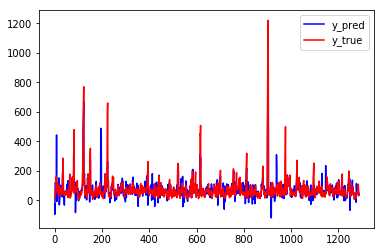

In [515]:
plt.plot(pred.values,color="b",label="y_pred")
plt.plot(y.values,color="r",label="y_true")
plt.legend()


In [543]:
sig=list(res1.pvalues[res1.pvalues<=0.05].index)
sig

['Changes in Inventories',
 'Deferred Asset Charges',
 'Depreciation',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Gross Profit',
 'Interest Expense',
 'Long-Term Investments',
 'Non-Recurring Items',
 'Operating Margin',
 'Other Assets',
 'Profit Margin',
 'Earnings Per Share']

In [542]:
for i in sig:
    print(res1.params[i])

1.1779704959560429e-08
-2.8272258632010046e-09
1.1219759108905504e-08
1.5363322068141716e-08
1.7544687554447907e-09
-2.107840340741703e-08
1.6960549911137824e-09
4.6502718290680756e-09
1.4709875449519778
3.9181966820373004e-09
-0.7066620899171978
15.396774790017828
